Exploratory Data Analysis (EDA)

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('../data/Covid_without_dup.csv')

In [4]:
# Display the first 5 rows
print("First 5 rows:")
print(df.head())

First 5 rows:
       id                                               text  \
0  g7qe73                   Is there a Covid-19 Vaccine? No.   
1  g74xqv                   Is there a Covid-19 Vaccine? No.   
2  g74x66  rCovidVaccine Lounge A place for members of rC...   
3  gqolxg  Check out this video about coronavirus vaccine...   
4  hb5omo  If you can get Covid multiple times how can a ...   

                author                created_utc  No_of_comments  \
0  addictos_to_doritos  2020-04-25 08:51:20+00:00             0.0   
1  addictos_to_doritos  2020-04-24 08:47:56+00:00             0.0   
2  addictos_to_doritos  2020-04-24 08:46:21+00:00             0.0   
3           sadkid3000  2020-05-26 02:33:24+00:00             0.0   
4    casualoverreactor  2020-06-18 02:17:30+00:00             3.0   

   Subjectivity  Polarity  Analysis Parent    Link  
0      0.000000  0.000000   Neutral      1  g7qe73  
1      0.000000  0.000000   Neutral      1  g74xqv  
2      0.375000 -0.125000  

In [5]:
# Display basic info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12915 entries, 0 to 12914
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              12915 non-null  object 
 1   text            12885 non-null  object 
 2   author          12915 non-null  object 
 3   created_utc     12915 non-null  object 
 4   No_of_comments  1726 non-null   float64
 5   Subjectivity    12915 non-null  float64
 6   Polarity        12915 non-null  float64
 7   Analysis        12915 non-null  object 
 8   Parent          12915 non-null  object 
 9   Link            12915 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1009.1+ KB
None


In [6]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
id                    0
text                 30
author                0
created_utc           0
No_of_comments    11189
Subjectivity          0
Polarity              0
Analysis              0
Parent                0
Link                  0
dtype: int64


In [7]:
# Describe numerical columns
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       No_of_comments  Subjectivity      Polarity
count     1726.000000  12915.000000  12915.000000
mean         7.909618      0.402113      0.081348
std         12.624152      0.267303      0.238037
min          0.000000      0.000000     -1.000000
25%          1.000000      0.200000      0.000000
50%          4.000000      0.433333      0.033333
75%         10.000000      0.570833      0.195833
max        222.000000      1.000000      1.000000


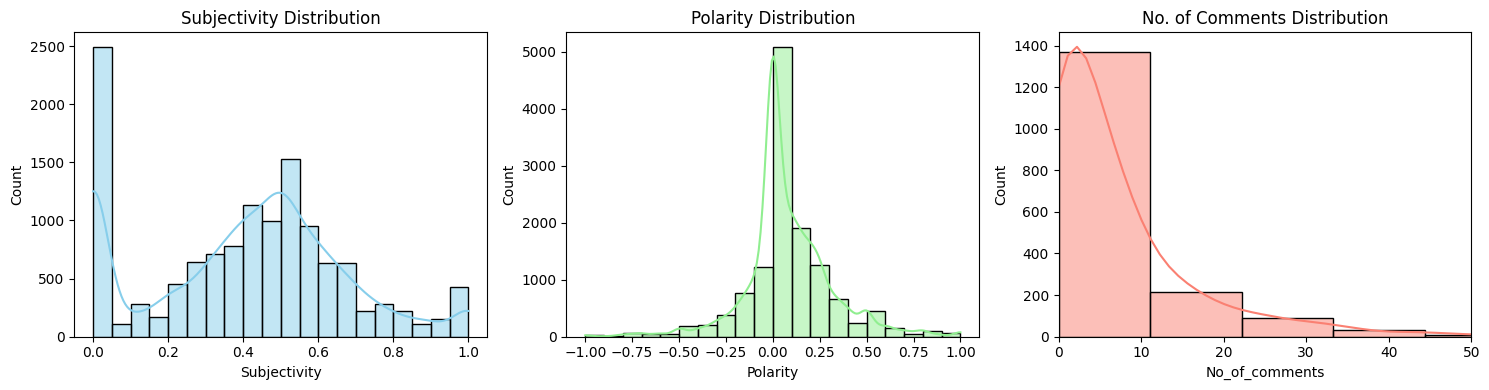

In [23]:
# Feature Distribution Analysis - Histograms
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['Subjectivity'], bins=20, kde=True, color='skyblue')
plt.title('Subjectivity Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Polarity'], bins=20, kde=True, color='lightgreen')
plt.title('Polarity Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['No_of_comments'], bins=20, kde=True, color='salmon')
plt.title('No. of Comments Distribution')
plt.xlim(0, 50)  # Limit x-axis to zoom in on skew

plt.tight_layout()
plt.show()

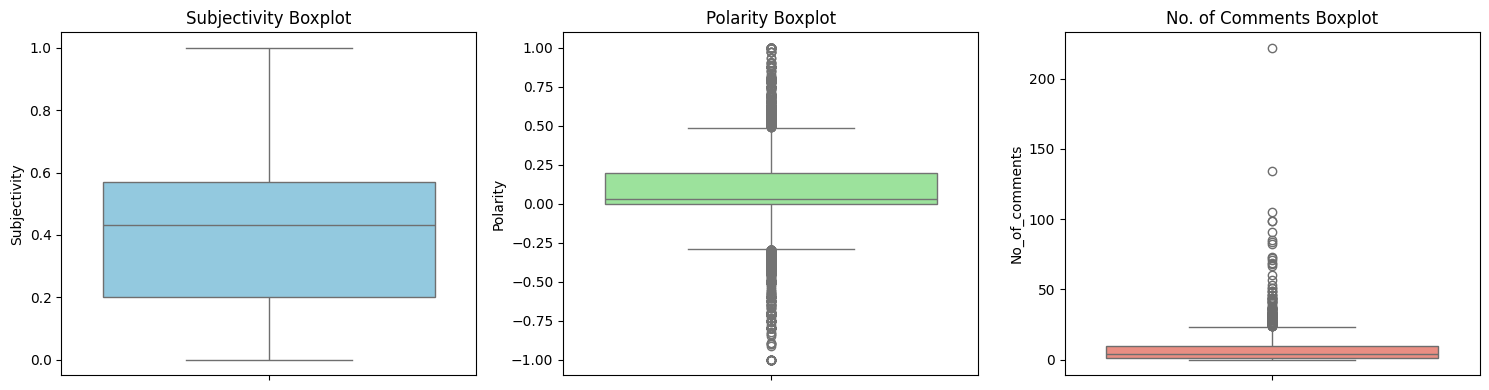

In [20]:
# Boxplot Analysis for Outlier Detection
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['Subjectivity'], color='skyblue')
plt.title('Subjectivity Boxplot')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Polarity'], color='lightgreen')
plt.title('Polarity Boxplot')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['No_of_comments'], color='salmon')
plt.title('No. of Comments Boxplot')

plt.tight_layout()
plt.show()

In [ ]:
# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [102]:
# Display column names
print("\nColumn names:")
print(df.columns.tolist())


Column names:
['id', 'text', 'author', 'created_utc', 'No_of_comments', 'Subjectivity', 'Polarity', 'Analysis', 'Parent', 'Link']


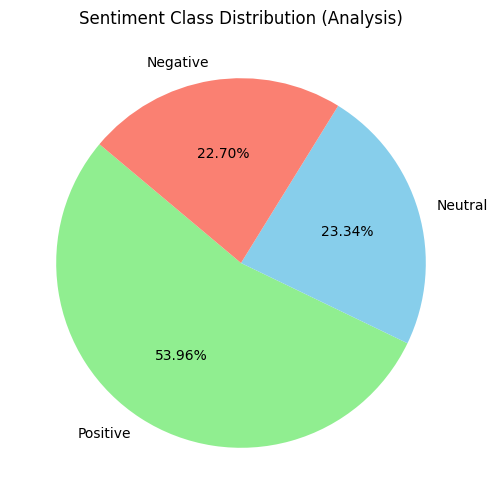

In [ ]:
# Visualize the sentiment distribution
# Count sentiment classes
analysis_counts = df['Analysis'].value_counts()

# Get labels in the desired color
labels_order = analysis_counts.index.tolist()
label_color_mapping = {
    'Neutral': 'skyblue',
    'Negative': 'salmon',
    'Positive': 'lightgreen'
}
# Map colors based on label order
custom_colors = [label_color_mapping[label] for label in labels_order]

# Plot Pie Chart
plt.figure(figsize=(6,6))
plt.pie(analysis_counts, labels=labels_order, colors=custom_colors, autopct='%.2f%%', startangle=140)
plt.title('Sentiment Class Distribution (Analysis)')
plt.show()

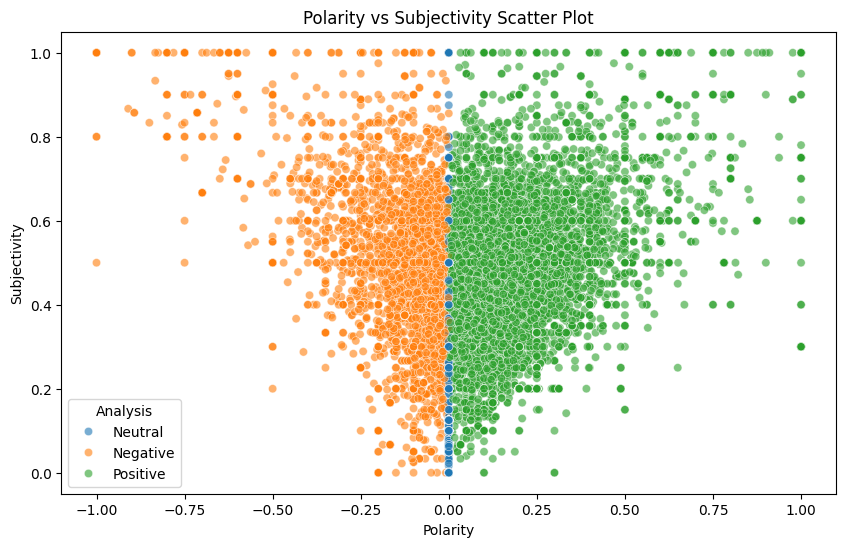

In [104]:
# Visualize the relationship between 'Polarity' and 'Subjectivity'
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Polarity', y='Subjectivity', hue='Analysis', alpha=0.6)
plt.title('Polarity vs Subjectivity Scatter Plot')
plt.show()